In [75]:
pwd

'/content'

#Question 1

##1. Read the data from the csv file and split it into training set (the first 120 examples), validation set (the next 40 examples), and testing set (the last 40 examples). Plot the examples from the three sets in a scatter plot (each set encoded with a different color). Note that the plot here will be 3D plot where the x and y axes represent the x1 and x2 features, whereas the z-axis is the target label y.

In [76]:
import pandas as pd


df = pd.read_csv("data_reg.csv")
print(df.head())
df.describe()
df.info()

         x1        x2         y
0  0.548814  0.311796  0.547818
1  0.715189  0.696343  0.576032
2  0.602763  0.377752  0.113475
3  0.544883  0.179604  1.072286
4  0.423655  0.024679  0.624525
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      200 non-null    float64
 1   x2      200 non-null    float64
 2   y       200 non-null    float64
dtypes: float64(3)
memory usage: 4.8 KB


In [77]:
! pip install fast_ml --quiet

faster way to create the three sets

source: https://medium.com/@utkarsh.kant/how-to-split-your-dataset-into-train-test-and-validation-sets-17f40e98dfd0


In [78]:
from fast_ml.model_development import train_valid_test_split

X_train, y_train, X_valid, y_valid, X_test, y_test = train_valid_test_split(df, target='y',
                                                                            train_size=0.6,
                                                                            valid_size=0.2,
                                                                            test_size=0.2)

print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)
print(X_test.shape, y_test.shape)
X_train.head(10)

(120, 2) (120,)
(40, 2) (40,)
(40, 2) (40,)


,x1,x2
165,0.855803,0.458604
182,0.577229,0.951874
0,0.548814,0.311796
127,0.301575,0.695625
113,0.297437,0.089603
107,0.572252,0.053427
126,0.019193,0.683281
34,0.018790,0.207470
105,0.576157,0.232234
70,0.976459,0.977495


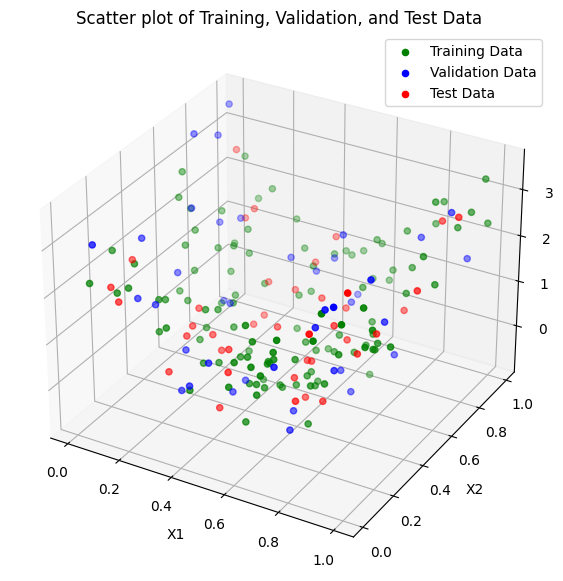

In [79]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")

ax.scatter3D(X_train[['x1']], X_train[['x2']], y_train, color = "green", label="Training Data")
ax.scatter3D(X_valid[['x1']], X_valid[['x2']], y_valid, color="blue", label="Validation Data")
ax.scatter3D(X_test[['x1']], X_test[['x2']], y_test, color="red", label="Test Data")

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
ax.set_title('Scatter plot of Training, Validation, and Test Data')
ax.legend()


plt.show()

the dataset contains 200 examples, split as follows:
train: 120 examples
valid: 40 examples
test: 40 examples

X axis for x1
,y axis for x2
,z axis for y

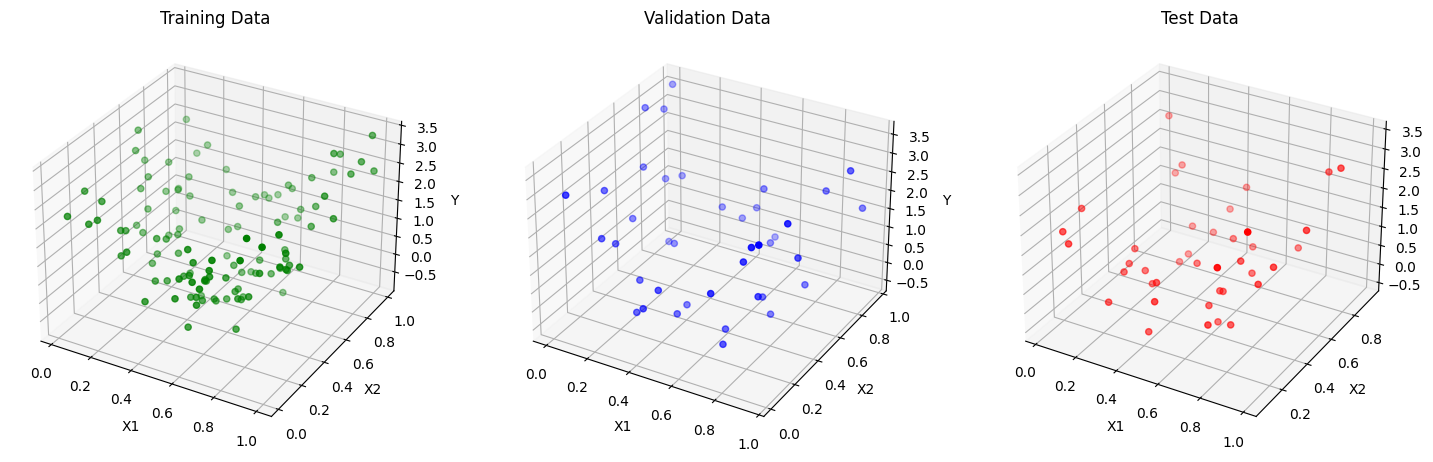

In [80]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

# Plotting training data
fig, axs = plt.subplots(1, 3, figsize=(18, 6), subplot_kw={'projection': '3d'})

# Training data plot
axs[0].scatter3D(X_train[['x1']], X_train[['x2']], y_train, color="green")
axs[0].set_xlabel('X1')
axs[0].set_ylabel('X2')
axs[0].set_zlabel('Y')
axs[0].set_title('Training Data')

# Validation data plot
axs[1].scatter3D(X_valid[['x1']], X_valid[['x2']], y_valid, color="blue")
axs[1].set_xlabel('X1')
axs[1].set_ylabel('X2')
axs[1].set_zlabel('Y')
axs[1].set_title('Validation Data')

# Test data plot
axs[2].scatter3D(X_test[['x1']], X_test[['x2']], y_test, color="red")
axs[2].set_xlabel('X1')
axs[2].set_ylabel('X2')
axs[2].set_zlabel('Y')
axs[2].set_title('Test Data')

plt.show()


In [81]:
pip install --upgrade matplotlib


##2. Apply polynomial regression on the training set with degrees in the range of 1 to 10. Which polynomial degree is the best? Justify your answer by plotting the validation error vs polynomial degree curve. For each model plot the surface of the learned function alongside with the training examples on the same plot.(hint: you can use PolynomialFeatures and LinearRegression from scikit-learn library)

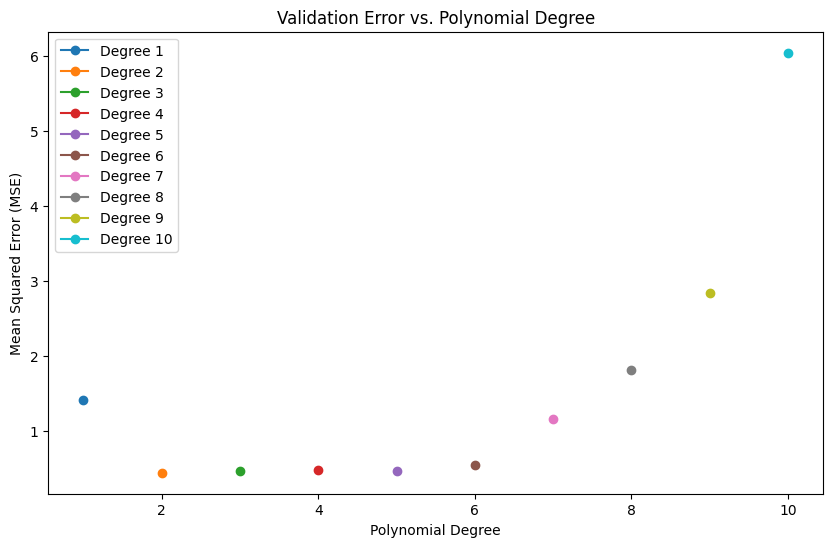

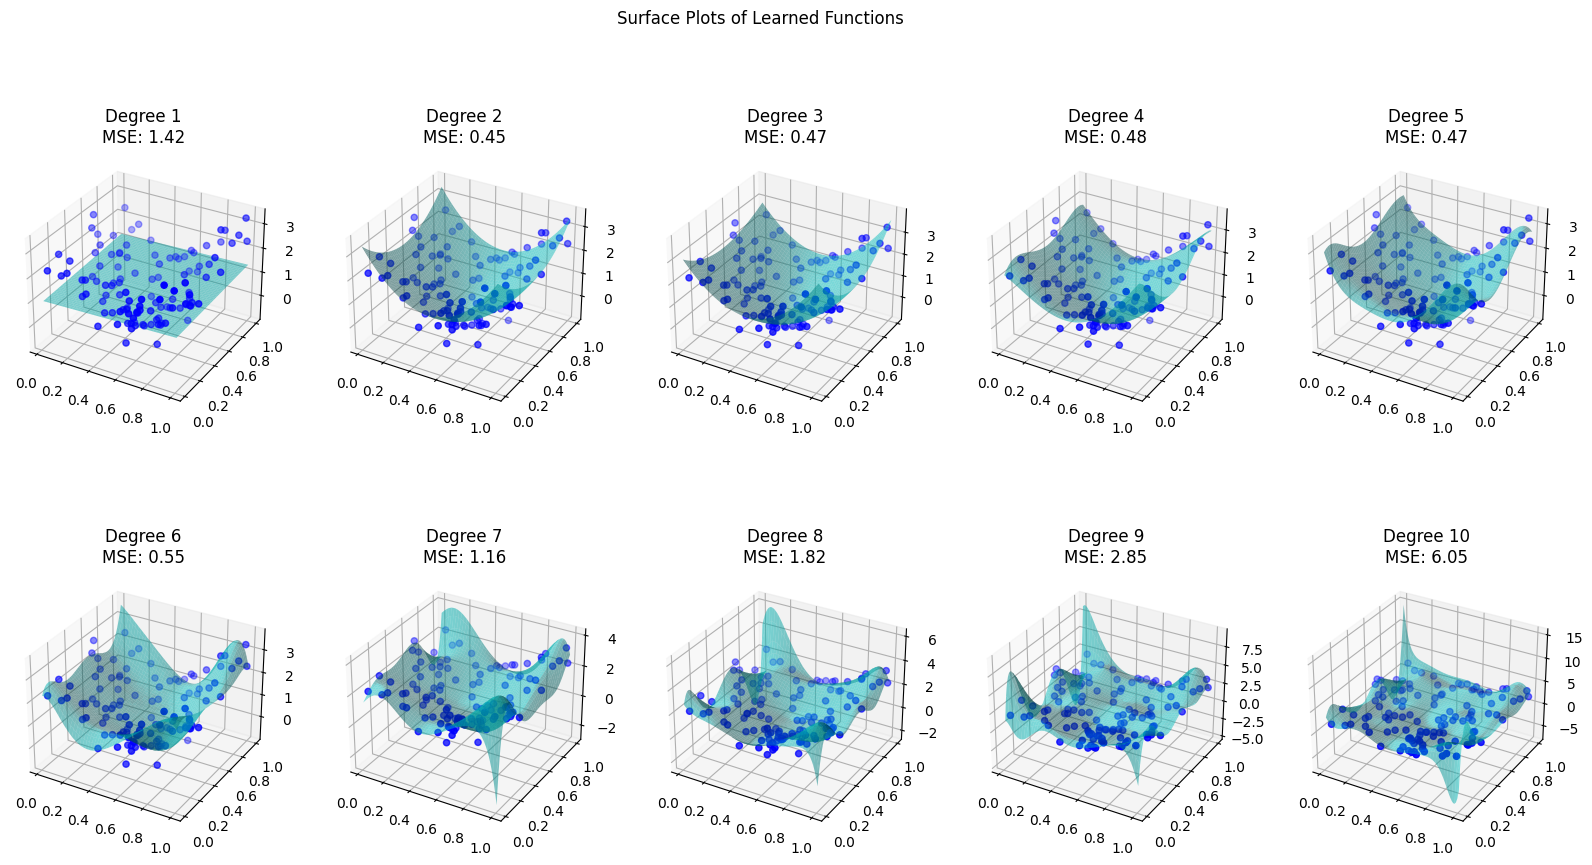

In [82]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D



degrees = np.arange(1, 11)
validation_errors = []

# validation error vs. polynomial degree
fig_validation, ax_validation = plt.subplots(figsize=(10, 6))
ax_validation.set_title('Validation Error vs. Polynomial Degree')

# surface plots
fig_surface, axs_surface = plt.subplots(2, 5, figsize=(20, 10), subplot_kw={'projection': '3d'})
fig_surface.suptitle('Surface Plots of Learned Functions')

for i, degree in enumerate(degrees):
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_valid_poly = poly.transform(X_valid)

    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    y_valid_pred = model.predict(X_valid_poly)

    #(Mean Squared Error)
    mse = mean_squared_error(y_valid, y_valid_pred)
    validation_errors.append(mse)

    # Plot surface for each degree
    ax_surface = axs_surface[i // 5, i % 5]
    ax_surface.set_title(f'Degree {degree}\nMSE: {mse:.2f}')

    ax_surface.scatter(X_train['x1'], X_train['x2'], y_train, color='b', label='Training Set')

    # Plot surface
    x1_range = np.linspace(X_train['x1'].min(), X_train['x1'].max(), 100)
    x2_range = np.linspace(X_train['x2'].min(), X_train['x2'].max(), 100)
    x1_mesh, x2_mesh = np.meshgrid(x1_range, x2_range)
    X_surface = np.column_stack((x1_mesh.ravel(), x2_mesh.ravel()))
    X_surface_poly = poly.transform(X_surface)
    y_surface = model.predict(X_surface_poly)
    y_surface = y_surface.reshape(x1_mesh.shape)

    b = ax_surface.plot_surface(x1_mesh, x2_mesh, y_surface, color='c', alpha=0.5)

    # Plot training examples on the validation error plot
    ax_validation.plot(degree, mse, marker='o', label=f'Degree {degree}')

ax_validation.set_xlabel('Polynomial Degree')
ax_validation.set_ylabel('Mean Squared Error (MSE)')
ax_validation.legend()
plt.show()


the first graph represents the error in each degree from 1 to 10 on the training set, then the validation error is calculated.


the graphs below showcase how the data fits with different degrees.

##1.3: Apply ridge regression on the training set to fit a polynomial of degree 8. For the regularization parameter, choose the best value among the following options: {0.001, 0.005, 0.01, 0.1, 10}. Plot the MSE on the validation vs the regularization parameter. (hint: you can use Ridge regression implementation from scikit-learn)

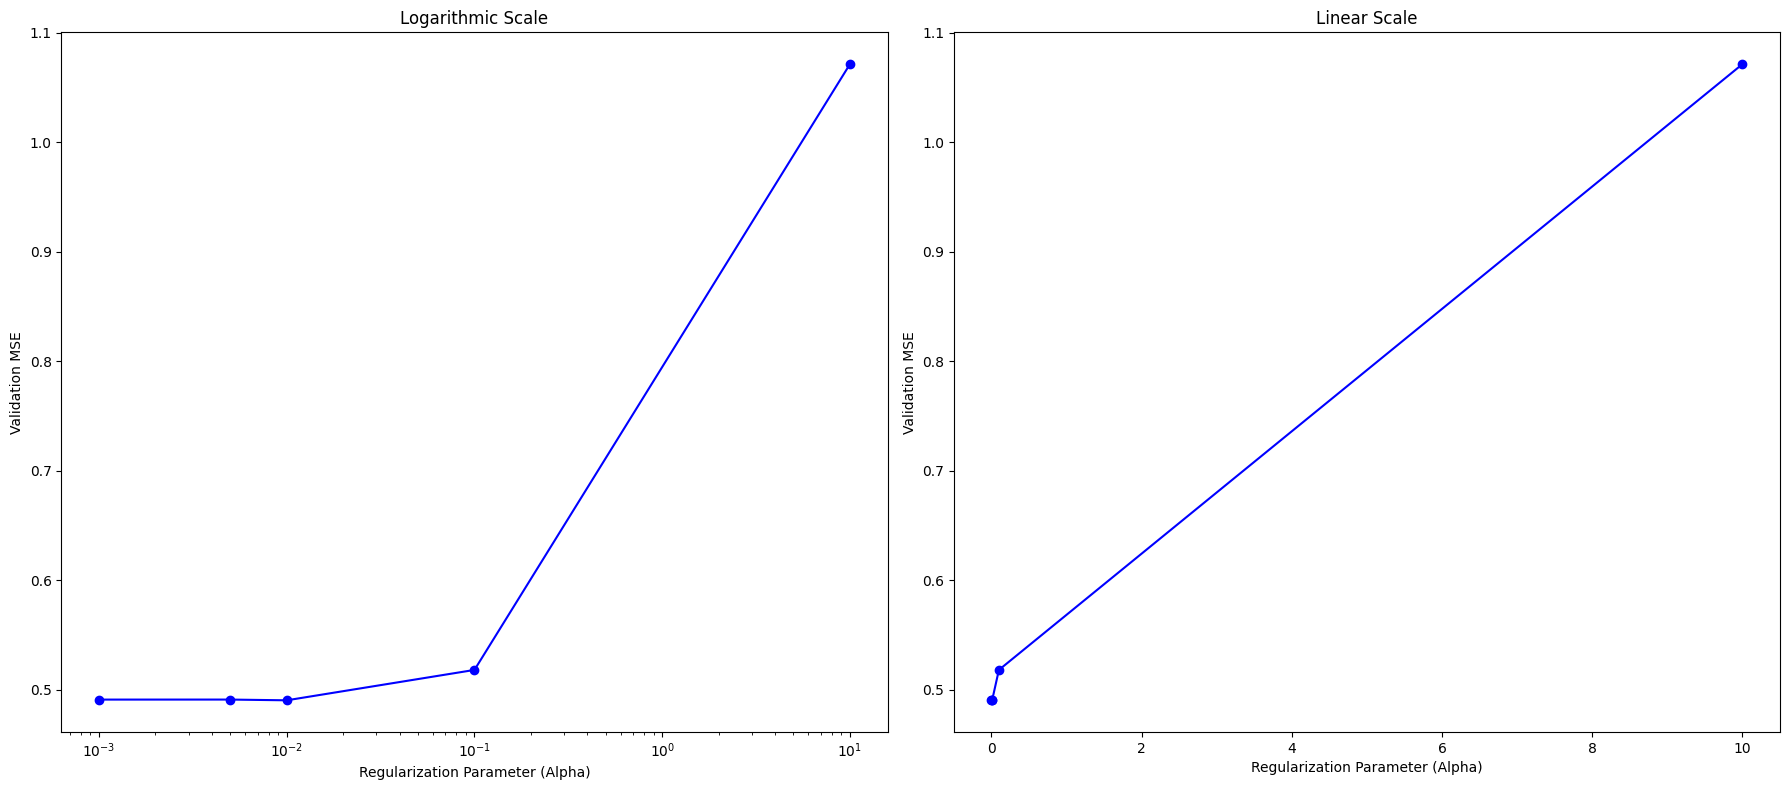

In [83]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures


degree = 9
alphas = [0.001, 0.005, 0.01, 0.1, 10]

poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_valid_poly = poly.transform(X_valid)
mse_err = []

for alpha in alphas:
  ridge_r = Ridge(alpha=alpha)
  ridge_r.fit(X_train_poly, y_train)

  pred_y = ridge_r.predict(X_valid_poly)
  mse_err.append(mean_squared_error(y_valid, pred_y))

plt.figure(figsize=(18, 8))
plt.subplot(1, 2, 1)
plt.plot(alphas, mse_err, marker='o', color='b')
plt.xscale('log')
plt.xlabel('Regularization Parameter (Alpha)')
plt.ylabel('Validation MSE')
plt.title('Logarithmic Scale')

plt.subplot(1, 2, 2)
plt.plot(alphas, mse_err, marker='o', color='b')
plt.xlabel('Regularization Parameter (Alpha)')
plt.ylabel('Validation MSE')
plt.title('Linear Scale')

plt.tight_layout()
plt.show()


The graphs represent the Alpha vs the mse, at its lowest at alpha = 0.01

#Question 2

##1. using the logistic regression implementation of scikit-learn library, Learn a logistic regression model with a linear decision boundary. Draw the decision boundary of the learned model on a scatterplot of the training set (similar to Figure 1). Compute the training and testing accuracy of the learned model

Training Accuracy: 0.66
Testing Accuracy: 0.68


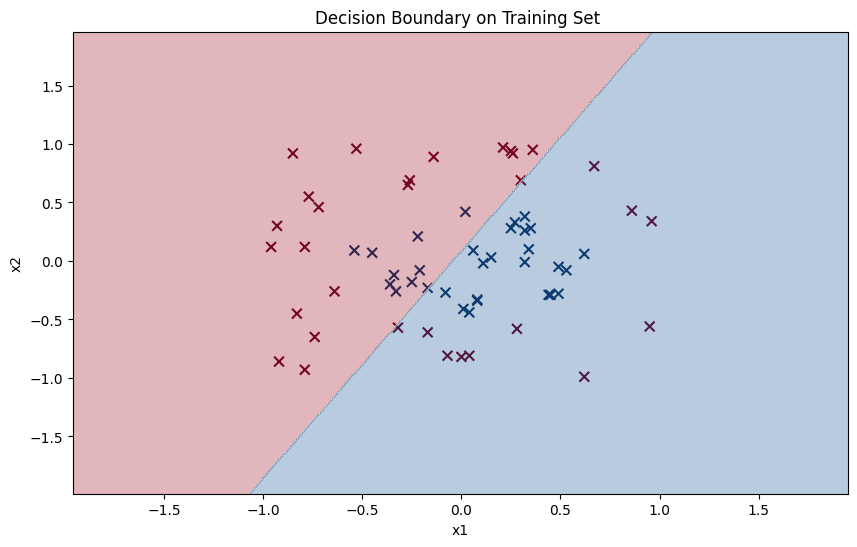

Training Accuracy: 66.13%
Testing Accuracy: 68.18%


In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder


train_data = pd.read_csv('train_cls.csv')
X_train = train_data[['x1', 'x2']]
y_train = train_data['class']

test_data = pd.read_csv('test_cls.csv')
X_test = test_data[['x1', 'x2']]
y_test = test_data['class']


le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

#logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train_encoded)

# Compute training and testing accuracy
train_accuracy = model.score(X_train, y_train_encoded)
test_accuracy = model.score(X_test, y_test_encoded)

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Testing Accuracy: {test_accuracy:.2f}")

x_min, x_max = X_train['x1'].min() - 1, X_train['x1'].max() + 1
y_min, y_max = X_train['x2'].min() - 1, X_train['x2'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z_encoded = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

# Plotting the decision boundary with encoded classes
plt.figure(figsize=(10, 6))
plt.scatter(train_data['x1'], train_data['x2'], c=y_train_encoded, cmap='RdBu', marker='x', s=50)
plt.contourf(xx, yy, Z_encoded, alpha=0.3, cmap='RdBu')

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Decision Boundary')
plt.show()

# Display training and testing accuracy
print(f'Training Accuracy: {train_accuracy * 100:.2f}%')
print(f'Testing Accuracy: {test_accuracy * 100:.2f}%')

Accuracy is low on the linear logistic regression, that is because it doesn't give the data it's true class, or don't seperate it rightfully.

As said the error comes from the values that are wrongly classified, and it's evident this isn't the best way to classiffy the data

##2. Repeat part 1 but now to learn a logistic regression model with quadratic decision boundary.

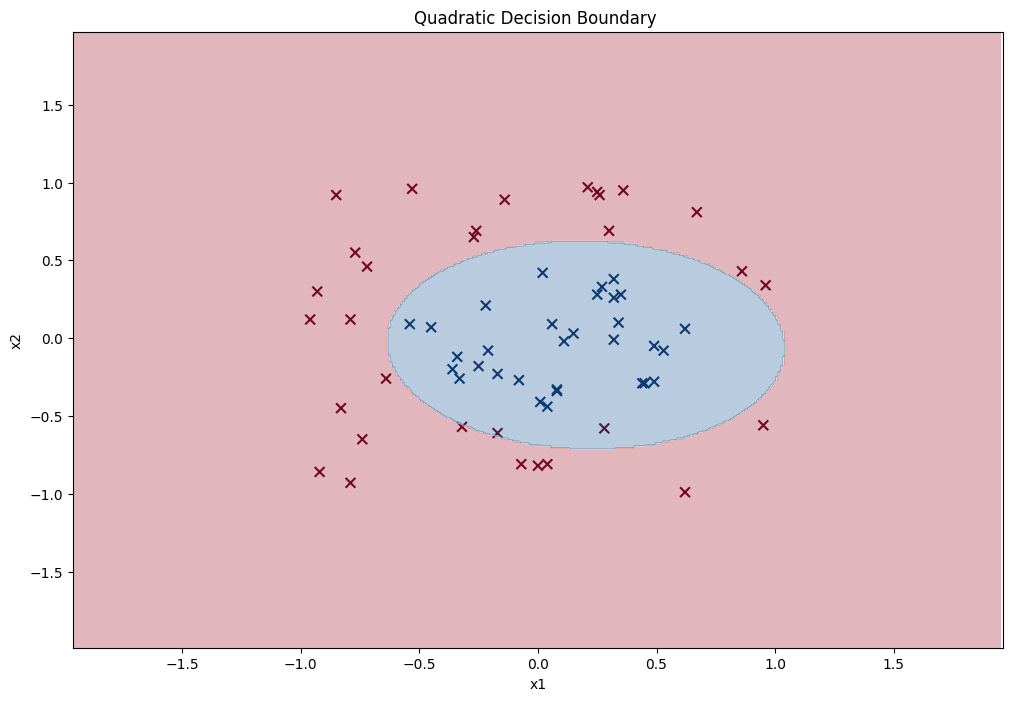

Training Accuracy: 96.77%
Testing Accuracy: 95.45%


In [86]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

model_quad = LogisticRegression()
model_quad.fit(X_train_poly, y_train_encoded)

xx_poly = poly_features.transform(np.c_[xx.ravel(), yy.ravel()])
Z_quad = model_quad.predict(xx_poly).reshape(xx.shape)

plt.figure(figsize=(12, 8))
plt.scatter(train_data['x1'], train_data['x2'], c=y_train_encoded, cmap='RdBu', marker='x', s=50)
plt.contourf(xx, yy, Z_quad, alpha=0.3, cmap='RdBu')

# Plot formatting
plt.xlim(X_train['x1'].min() - 1, X_train['x1'].max() + 1)
plt.ylim(X_train['x2'].min() - 1, X_train['x2'].max() + 1)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Quadratic Decision Boundary ')
plt.show()

# Displaying accuracies
train_accuracy_quad = model_quad.score(X_train_poly, y_train_encoded)
test_accuracy_quad = model_quad.score(X_test_poly, y_test_encoded)
print(f'Training Accuracy: {train_accuracy_quad * 100:.2f}%')
print(f'Testing Accuracy: {test_accuracy_quad * 100:.2f}%')



It is showing a huge boost in accuracy while using the quadratic boundary, the classes are separated better with it.



3. Comment on the learned models in 1 and 2 in terms of overfitting/underfitting

The first model is definitly underfitted as it's accuracy is bad at training data, whereas the second model got good accuracy in the training and the validation set, with that said we have to further try it on the test data to really make sure, but I think it is evident that the model is well-fitted.